In [1]:
import numpy as np
import pandas as pd
import textwrap
import nltk
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('../01-Vector-Model-And-Text-Processing/bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


C:\Users\DELL\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='labels', ylabel='count'>

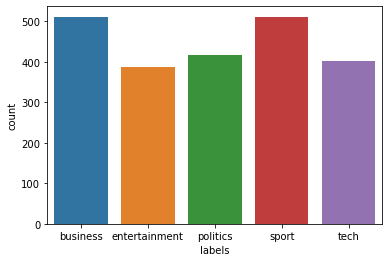

In [4]:
sns.countplot(df['labels'])

In [5]:
df['labels'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: labels, dtype: int64

In [6]:
test_data = df[df['labels'] == 'business']['text']
test_data = test_data[:5]
test_data

0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
2    Yukos unit buyer faces loan claim\n\nThe owner...
3    High fuel prices hit BA's profits\n\nBritish A...
4    Pernod takeover talk lifts Domecq\n\nShares in...
Name: text, dtype: object

In [7]:
def markov_probablity(test_data):
    
    probabilities = {}
    for doc in test_data:
        lines = doc.split('\n')
        for line in lines:
            tokens = word_tokenize(line.lower())
            for i in range(len(tokens) -2):
                t_0 = tokens[i]
                t_1 = tokens[i+1]
                t_2 = tokens[i+2]
                key = (t_0,t_2)
                if key not in probabilities:
                    probabilities[key] = {}
                # add count for middle token
                if t_1 not in probabilities[key]:
                    probabilities[key][t_1] = 1
                else:
                    probabilities[key][t_1] += 1
    return probabilities

In [8]:
probablities = markov_probablity(test_data)
print('probablities\n',probablities)

probablities
 {('ad', 'boost'): {'sales': 1}, ('sales', 'time'): {'boost': 1}, ('boost', 'warner'): {'time': 1}, ('time', 'profit'): {'warner': 1}, ('quarterly', 'at'): {'profits': 1}, ('profits', 'us'): {'at': 1}, ('at', 'media'): {'us': 1}, ('us', 'giant'): {'media': 1}, ('media', 'timewarner'): {'giant': 1}, ('giant', 'jumped'): {'timewarner': 1}, ('timewarner', '76'): {'jumped': 1}, ('jumped', '%'): {'76': 1}, ('76', 'to'): {'%': 1}, ('%', '$'): {'to': 4}, ('to', '1.13bn'): {'$': 1}, ('$', '('): {'1.13bn': 1, '900m': 1}, ('1.13bn', '£600m'): {'(': 1}, ('(', ')'): {'£600m': 1, 'sec': 1, '£479m': 1}, ('£600m', 'for'): {')': 1}, (')', 'the'): {'for': 1}, ('for', 'three'): {'the': 2}, ('the', 'months'): {'three': 2}, ('three', 'to'): {'months': 2}, ('months', 'december'): {'to': 1}, ('to', ','): {'december': 1, 'year-earlier': 1, '£1.97bn': 1}, ('december', 'from'): {',': 1}, (',', '$'): {'from': 2}, ('from', '639m'): {'$': 1}, ('$', 'year-earlier'): {'639m': 1}, ('639m', '.'): {'year-

In [9]:
def normalize(probs):
    for k,d in probs.items():
        total = sum(d.values())
        for k,v in d.items():
            d[k] = v/total

In [10]:
normalize(probablities)
print('probablities\n',probablities)

probablities
 {('ad', 'boost'): {'sales': 1.0}, ('sales', 'time'): {'boost': 1.0}, ('boost', 'warner'): {'time': 1.0}, ('time', 'profit'): {'warner': 1.0}, ('quarterly', 'at'): {'profits': 1.0}, ('profits', 'us'): {'at': 1.0}, ('at', 'media'): {'us': 1.0}, ('us', 'giant'): {'media': 1.0}, ('media', 'timewarner'): {'giant': 1.0}, ('giant', 'jumped'): {'timewarner': 1.0}, ('timewarner', '76'): {'jumped': 1.0}, ('jumped', '%'): {'76': 1.0}, ('76', 'to'): {'%': 1.0}, ('%', '$'): {'to': 1.0}, ('to', '1.13bn'): {'$': 1.0}, ('$', '('): {'1.13bn': 0.5, '900m': 0.5}, ('1.13bn', '£600m'): {'(': 1.0}, ('(', ')'): {'£600m': 0.3333333333333333, 'sec': 0.3333333333333333, '£479m': 0.3333333333333333}, ('£600m', 'for'): {')': 1.0}, (')', 'the'): {'for': 1.0}, ('for', 'three'): {'the': 1.0}, ('the', 'months'): {'three': 1.0}, ('three', 'to'): {'months': 1.0}, ('months', 'december'): {'to': 1.0}, ('to', ','): {'december': 0.3333333333333333, 'year-earlier': 0.3333333333333333, '£1.97bn': 0.333333333333

In [11]:
def spin_article(doc):
    lines = doc.split('\n')
    output = []
    for line in lines:
        if line:
            new_line = spin_line(line)
        else:
            new_line = line
        output.append(new_line)
    return '\n'.join(output)
        

In [12]:
detokenizer = TreebankWordDetokenizer()
s = test_data.iloc[0].split('\n')[0]
print(s)
s = detokenizer.detokenize(word_tokenize(s))
print(s)

Ad sales boost Time Warner profit
Ad sales boost Time Warner profit


In [13]:
def sample_word(d):
    p0 = np.random.random()
    cumulative = 0
    for t,p in d.items():
        cumulative += p
        if p0 < cumulative:
            return t
    assert(False)

In [14]:
def spin_line(line):
    tokens = word_tokenize(line.lower())
    i = 0
    output = [tokens[0]]
    while i < (len(tokens) -2):
        t_0 = tokens[i]
        t_1 = tokens[i + 1]
        t_2 = tokens[i + 2]
        key = (t_0,t_2)
        p_dist = probablities[key]
        
        if len(p_dist) > 1 and np.random.random() < 0.3:
            middle = sample_word(p_dist)
            output.append(t_1)
            output.append('<' + middle + '>')
            output.append(t_2)
            i += 2
        else:
            output.append(t_1)
            i += 1
        if i == len(tokens) -2:
            output.append(tokens[-1])
            
    return detokenizer.detokenize(tokens)

In [15]:
s = test_data.iloc[0].split('\n')[2]
print(s)
s = spin_line(s)
print(s)

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.
quarterly profits at us media giant timewarner jumped 76% to $1.13bn (£600m) for the three months to december, from $639m year-earlier.


In [16]:
np.random.seed(1234)
i = np.random.choice(test_data.shape[0])
doc = test_data[i]
new_doc = spin_article(doc)
print(textwrap.fill(new_doc,replace_whitespace=False,fix_sentence_endings=True))

high fuel prices hit ba's profits

british airways has blamed high
fuel prices for a 40% drop in profits.

reporting its results for the
three months to 31 december 2004, the airline made a pre-tax profit of
£75m ($141m) compared with £125m a year earlier . rod eddington, ba's
chief executive, said the results were "respectable" in a third
quarter when fuel costs rose by £106m or 47.3% . ba's profits were
still better than market expectation of £59m, and it expects a rise in
full-year revenues.

to help offset the increased price of aviation
fuel, ba last year introduced a fuel surcharge for passengers.

in
october, it increased this from £6 to £10 one-way for all long-haul
flights, while the short-haul surcharge was raised from £2.50 to £4 a
leg . yet aviation analyst mike powell of dresdner kleinwort
wasserstein says ba's estimated annual surcharge revenues - £160m -
will still be way short of its additional fuel costs - a predicted
extra £250m . turnover for the quarter was up 4.3% 